<a href="https://colab.research.google.com/github/anvq38/AI/blob/master/18520440_VoQuocAn_QLearning_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gym
env = gym.make('FrozenLake-v0')

In [ ]:
def q_learning(env, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.9, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.00005, tracking=False):
    # Initialize Q(s,a) table
    q_values = np.zeros((env.observation_space.n, env.action_space.n))

    history_rewards = []

    # Train the agent by playing multiple episodes and gain experience
    for episode in range(num_training_episodes):
        # Reset the environment and get the starting state
        state = env.reset()
        done = False
        total_reward = 0

        # If epsilon_decay_rate is 0.0, the value of epsilon is fixed at its starting value
        if epsilon_decay_rate == 0.0:
            epsilon = epsilon_start
        else:
            epsilon = epsilon_min + (epsilon_start - epsilon_min)*np.exp(-epsilon_decay_rate*episode)
        
        # Play one episode
        while not done:
            # Choose an action following an epsilon-greedy policy
            if np.random.uniform(0,1) < epsilon:
                action = np.random.randint(env.action_space.n)
            else:
                action = np.argmax(q_values[state])
            
            # Take the chosen action and observe the experience
            next_state, reward, done, info = env.step(action)

            # Use the observation to update Q(s,a)
            q_values[state,action] = (1-alpha)*q_values[state,action] + alpha*(reward + gamma * np.max(q_values[next_state]))

            total_reward += reward

            state = next_state

        # After every validation_interval episode, we evaluate the policy obtained so far
        # by using it to play 1000 games and computing the average reward.
        if (episode % validation_interval) == 0:
            avg_reward = play_multiple_times(env, q_values, num_validation_episodes=1000)
            history_rewards.append(avg_reward)
            if tracking:
                print('Episode: {} - epsilon: {} - average reward: {}'.format(episode, epsilon, avg_reward))

    return q_values, history_rewards

In [ ]:
def play_multiple_times(env, q_values, num_validation_episodes=1000):
    """
    Check the quality of the policy encoded by the Q-value table.
    Use that policy to play multiple games, and get the average reward.
    """
    all_rewards = []

    for episode in range(num_validation_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(q_values[state])
            next_state, reward, done, info = env.step(action)

            episode_reward += reward
            state = next_state
            if done:
                all_rewards.append(episode_reward)
    
    return np.mean(all_rewards)

In [ ]:
# Let's run this line of code multiple times.
# Does it succeed to find a good policy all the times?
q_values, history_rewards = q_learning(env, num_training_episodes=20001, 
           validation_interval=1000, alpha=0.02, gamma=0.95, 
           epsilon_start=0.25, epsilon_min=0.01, epsilon_decay_rate=0.0,
           tracking=True)

Episode: 0 - epsilon: 0.25 - average reward: 0.0
Episode: 1000 - epsilon: 0.25 - average reward: 0.06
Episode: 2000 - epsilon: 0.25 - average reward: 0.064
Episode: 3000 - epsilon: 0.25 - average reward: 0.176
Episode: 4000 - epsilon: 0.25 - average reward: 0.191
Episode: 5000 - epsilon: 0.25 - average reward: 0.167
Episode: 6000 - epsilon: 0.25 - average reward: 0.656
Episode: 7000 - epsilon: 0.25 - average reward: 0.607
Episode: 8000 - epsilon: 0.25 - average reward: 0.648
Episode: 9000 - epsilon: 0.25 - average reward: 0.725
Episode: 10000 - epsilon: 0.25 - average reward: 0.716
Episode: 11000 - epsilon: 0.25 - average reward: 0.736
Episode: 12000 - epsilon: 0.25 - average reward: 0.736
Episode: 13000 - epsilon: 0.25 - average reward: 0.726
Episode: 14000 - epsilon: 0.25 - average reward: 0.725
Episode: 15000 - epsilon: 0.25 - average reward: 0.714
Episode: 16000 - epsilon: 0.25 - average reward: 0.648
Episode: 17000 - epsilon: 0.25 - average reward: 0.719
Episode: 18000 - epsilon: 

In [ ]:
def perform_rl_algorithm_multiple_times(env, num_times=100, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.95, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.0):
    """
    If we run an algorithm with some hyperparameter settings only once, 
    its success or failure can be merely due to chance.
    To verify more accurately the performance of an algorithm and its certain hyperparameter settings,
    we need to run the algorithm with such hyperparameter settings multiple times.
    """
    all_history = []

    for i in range(num_times):
        print('Run {}'.format(i))
        q_values, history_reward = q_learning(env, num_training_episodes, validation_interval, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay_rate, tracking=False)
        all_history.append(history_reward)
    
    mean_reward = np.array(all_history)
    mean_reward = np.mean(mean_reward, axis=0)
    mean_reward = np.vstack((np.arange(num_training_episodes, step=validation_interval),mean_reward))
    #print(meam_reward)
    return mean_reward

In [ ]:
# Let's try q-learing with epsilon-greedy having a small fixed epsilon value
mean_reward_small_epsilon = perform_rl_algorithm_multiple_times(env, num_times=10,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.02,
                                                  gamma=0.95,
                                                  epsilon_start=0.25,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.0
                                                  )

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


In [ ]:
# Let's try q-learning with epsilon-greedy and the epsilon value is decayed over time
mean_reward_epsilon_decay = perform_rl_algorithm_multiple_times(env, num_times=10,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.02,
                                                  gamma=0.95,
                                                  epsilon_start=0.25,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00005
                                                  )

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

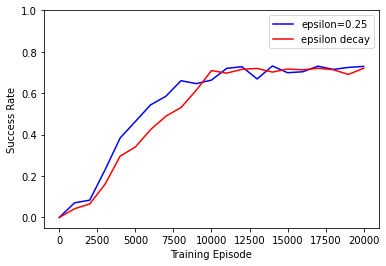

In [ ]:
# Which algorithm/hyperparameter setting has the faster speed?
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_small_epsilon[0],mean_reward_small_epsilon[1], 'b-', label='epsilon=0.25')
plt.plot(mean_reward_epsilon_decay[0], mean_reward_epsilon_decay[1], 'r-', label='epsilon decay')
plt.legend()

Q-Learning:
1. Thuật toán Value Iteration khi giải quyết game FrozenLake-v0 chúng ta có trung bình 712 lần thành công nếu chơi 1000 episodes.
2. Nếu tăng learning rate alpha lên quá cao thì:
+ Thuật toán Q_learning sẽ không hội tụ.
+ Giá trị reward nhận được qua các mỗi lượt thử sẽ khác biệt nhau rất lớn.
3. Giá trị của epsilon hợp lý với FrozenLake-v0 là 0.25.
4. Khi thiết lập 1 giá trị epsilon cố định và Khi thiết lập epsilon với giá trị giảm dần theo thời gian thì performance của Q-Learning gần như bằng nhau.
5. Bộ hyperparameter settings (alpha = 0.02, gamma = 0.95, epsilon_start = 0.25, epsilon_decay_rate = 0.00005) có kết quả rất tốt.

  


In [ ]:
import numpy as np
import gym
env = gym.make('FrozenLake-v0')

In [ ]:
# SARSA
def sarsa(env, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.9, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.00005, tracking=False):
    # Initialize Q(s,a) table
    q_values = np.zeros((env.observation_space.n, env.action_space.n))

    history_rewards = []

    # Train the agent by playing multiple episodes and gain experience
    for episode in range(num_training_episodes):
        # Reset the environment and get the starting state
        state = env.reset()
        done = False
        total_reward = 0

        # If epsilon_decay_rate is 0.0, the value of epsilon is fixed at its starting value
        if epsilon_decay_rate == 0.0:
            epsilon = epsilon_start
        else:
            epsilon = epsilon_min + (epsilon_start - epsilon_min)*np.exp(-epsilon_decay_rate*episode)
        
        # Play one episode
        while not done:
            # Choose an action following an epsilon-greedy policy
            if np.random.uniform(0,1) < epsilon:
                action = np.random.randint(env.action_space.n)
            else:
                action = np.argmax(q_values[state])
            
            # Take the chosen action and observe the experience
            next_state, reward, done, info = env.step(action)

            # Choose an next_action following an epsilon-greedy policy
            if np.random.uniform(0,1) < epsilon:
                next_action = np.random.randint(env.action_space.n)
            else:
                next_action = np.argmax(q_values[next_state])

            # Use the observation to update Q(s,a)
            q_values[state,action] = (1-alpha)*q_values[state,action] + alpha*(reward + gamma * q_values[next_state, next_action])

            total_reward += reward

            state = next_state
            action = next_action

        # After every validation_interval episode, we evaluate the policy obtained so far
        # by using it to play 1000 games and computing the average reward.
        if (episode % validation_interval) == 0:
            avg_reward = play_multiple_times(env, q_values, num_validation_episodes=1000)
            history_rewards.append(avg_reward)
            if tracking:
                print('Episode: {} - epsilon: {} - average reward: {}'.format(episode, epsilon, avg_reward))

    return q_values, history_rewards

In [ ]:
def play_multiple_times(env, q_values, num_validation_episodes=1000):
    """
    Check the quality of the policy encoded by the Q-value table.
    Use that policy to play multiple games, and get the average reward.
    """
    all_rewards = []

    for episode in range(num_validation_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(q_values[state])
            next_state, reward, done, info = env.step(action)

            episode_reward += reward
            state = next_state
            if done:
                all_rewards.append(episode_reward)
    
    return np.mean(all_rewards)

In [ ]:
# Let's run this line of code multiple times.
# Does it succeed to find a good policy all the times?
q_values, history_rewards = sarsa(env, num_training_episodes=20001, 
           validation_interval=1000, alpha=0.015, gamma=0.96, 
           epsilon_start=0.4, epsilon_min=0.01, epsilon_decay_rate=0.0,
           tracking=True)

Episode: 0 - epsilon: 0.4 - average reward: 0.0
Episode: 1000 - epsilon: 0.4 - average reward: 0.036
Episode: 2000 - epsilon: 0.4 - average reward: 0.044
Episode: 3000 - epsilon: 0.4 - average reward: 0.122
Episode: 4000 - epsilon: 0.4 - average reward: 0.194
Episode: 5000 - epsilon: 0.4 - average reward: 0.257
Episode: 6000 - epsilon: 0.4 - average reward: 0.313
Episode: 7000 - epsilon: 0.4 - average reward: 0.635
Episode: 8000 - epsilon: 0.4 - average reward: 0.643
Episode: 9000 - epsilon: 0.4 - average reward: 0.656
Episode: 10000 - epsilon: 0.4 - average reward: 0.643
Episode: 11000 - epsilon: 0.4 - average reward: 0.646
Episode: 12000 - epsilon: 0.4 - average reward: 0.727
Episode: 13000 - epsilon: 0.4 - average reward: 0.734
Episode: 14000 - epsilon: 0.4 - average reward: 0.689
Episode: 15000 - epsilon: 0.4 - average reward: 0.713
Episode: 16000 - epsilon: 0.4 - average reward: 0.738
Episode: 17000 - epsilon: 0.4 - average reward: 0.664
Episode: 18000 - epsilon: 0.4 - average rew

In [ ]:
def perform_rl_algorithm_multiple_times(env, num_times=100, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.95, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.0):
    """
    If we run an algorithm with some hyperparameter settings only once, 
    its success or failure can be merely due to chance.
    To verify more accurately the performance of an algorithm and its certain hyperparameter settings,
    we need to run the algorithm with such hyperparameter settings multiple times.
    """
    all_history = []

    for i in range(num_times):
        print('Run {}'.format(i))
        q_values, history_reward = sarsa(env, num_training_episodes, validation_interval, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay_rate, tracking=False)
        all_history.append(history_reward)
    
    mean_reward = np.array(all_history)
    mean_reward = np.mean(mean_reward, axis=0)
    mean_reward = np.vstack((np.arange(num_training_episodes, step=validation_interval),mean_reward))
    #print(meam_reward)
    return mean_reward

In [ ]:
# Let's try sarsa with epsilon-greedy having a small fixed epsilon value
mean_reward_small_epsilonB = perform_rl_algorithm_multiple_times(env, num_times=10,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.015,
                                                  gamma=0.96,
                                                  epsilon_start=0.4,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.0
                                                  )

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


In [ ]:
# Let's try sarsa with epsilon-greedy and the epsilon value is decayed over time
mean_reward_epsilon_decayB = perform_rl_algorithm_multiple_times(env, num_times=10,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.015,
                                                  gamma=0.96,
                                                  epsilon_start=0.4,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00005
                                                  )

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


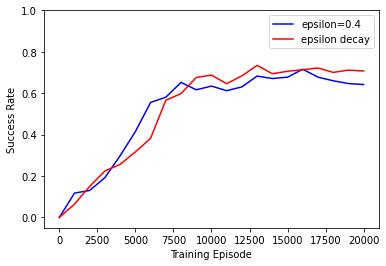

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Which algorithm/hyperparameter setting has the faster speed?
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_small_epsilonB[0],mean_reward_small_epsilonB[1], 'b-', label='epsilon=0.4')
plt.plot(mean_reward_epsilon_decayB[0], mean_reward_epsilon_decayB[1], 'r-', label='epsilon decay')
plt.legend()

Đồ thị kết quả so sánh performance của Q-Learning và SARSA 

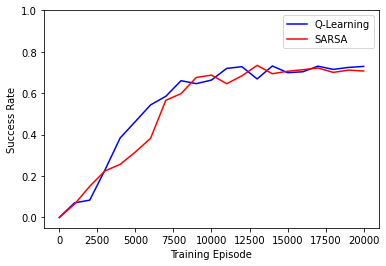

In [ ]:
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_small_epsilon[0],mean_reward_small_epsilon[1], 'b-', label='Q-Learning')
plt.plot(mean_reward_epsilon_decayB[0], mean_reward_epsilon_decayB[1], 'r-', label='SARSA')
plt.legend()

1. Giá trị của epsilon hợp lý với FrozenLake-v0 là 0.4.
2. Khi thiết lập 1 giá trị epsilon cố định và Khi thiết lập epsilon với giá trị giảm dần theo thời gian thì performance của SARSA gần như bằng nhau.
3. Bộ hyperparameter settings (alpha = 0.015, gamma = 0.96, epsilon_start = 0.4, epsilon_decay_rate = 0.00005) có kết quả rất tốt.

  